### Importación de datos



In [2]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [3]:
tienda["Tienda"] = "Store 1"
tienda2["Tienda"] = "Store 2"
tienda3["Tienda"] = "Store 3"
tienda4["Tienda"] = "Store 4"

tiendas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)
tiendas.head()
df=tiendas

In [4]:
ingresos_por_tienda=df.groupby('Tienda')["Precio"].sum()
ingresos_por_tienda

,Precio
Tienda,
Store 1,1.150880e+09
Store 2,1.116344e+09
Store 3,1.098020e+09
Store 4,1.038376e+09


# 2. Ventas por categoría

In [5]:
ventas_tiendas= len(df["Precio"])
ventas_tiendas



9435

In [8]:
ventas_categoria_tienda = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="CantidadVentas")
ventas_categoria_tienda


,Tienda,Categoría del Producto,CantidadVentas
0,Store 1,Artículos para el hogar,171
1,Store 1,Deportes y diversión,284
2,Store 1,Electrodomésticos,312
3,Store 1,Electrónicos,448
4,Store 1,Instrumentos musicales,182
5,Store 1,Juguetes,324
6,Store 1,Libros,173
7,Store 1,Muebles,465
8,Store 2,Artículos para el hogar,181
9,Store 2,Deportes y diversión,275


# 3. Calificación promedio de la tienda


In [9]:
calificacion_tienda=df.groupby("Tienda")["Calificación"].mean()
calificacion_tienda

,Calificación
Tienda,
Store 1,3.976685
Store 2,4.037304
Store 3,4.048326
Store 4,3.995759


# 4. Productos más y menos vendidos

In [13]:
ventas_prod = df.groupby(["Tienda","Producto"]).size().reset_index(name="Ventas")
ventas_prod

,Tienda,Producto,Ventas
0,Store 1,Ajedrez de madera,49
1,Store 1,Armario,60
2,Store 1,Asistente virtual,40
3,Store 1,Auriculares,50
4,Store 1,Auriculares con micrófono,33
...,...,...,...
199,Store 4,Smartwatch,39
200,Store 4,Sofá reclinable,47
201,Store 4,TV LED UHD 4K,40
202,Store 4,Tablet ABXY,45


In [18]:
top_productos = ventas_prod.sort_values(["Tienda", "Ventas"], ascending=[True, False]).groupby("Tienda").head(1)
top_productos

,Tienda,Producto,Ventas
1,Store 1,Armario,60
75,Store 2,Iniciando en programación,65
129,Store 3,Kit de bancas,57
163,Store 4,Cama box,62


In [19]:
bottom_productos = ventas_prod.sort_values(["Tienda", "Ventas"], ascending=[True, True]).groupby("Tienda").head(1)
bottom_productos

,Tienda,Producto,Ventas
4,Store 1,Auriculares con micrófono,33
77,Store 2,Juego de mesa,32
111,Store 3,Bloques de construcción,35
175,Store 4,Guitarra eléctrica,33


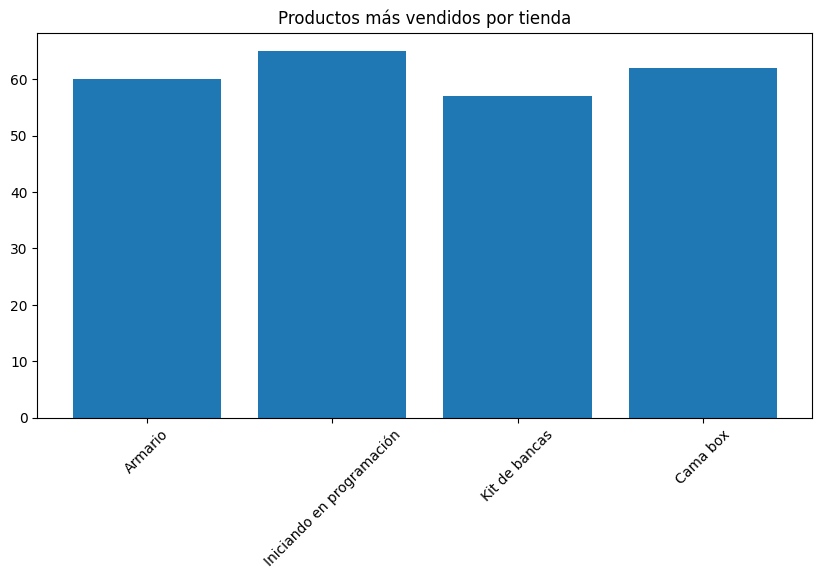

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(top_productos["Producto"], top_productos["Ventas"])
plt.title("Productos más vendidos por tienda")
plt.xticks(rotation=45)
plt.show()


# 5. Envío promedio por tienda

In [22]:
costo_envio_prom=df.groupby("Tienda")["Costo de envío"].mean()
costo_envio_prom

,Costo de envío
Tienda,
Store 1,26018.609580
Store 2,25216.235693
Store 3,24805.680373
Store 4,23459.457167


#*Ingresos por tienda*

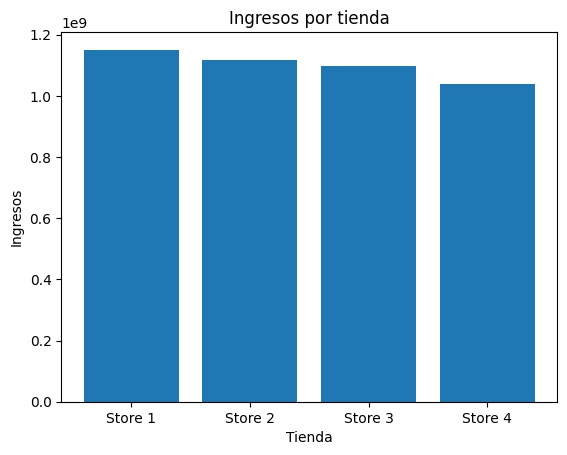

In [27]:
import matplotlib.pyplot as plt

ingresos_por_tienda = df.groupby("Tienda")["Precio"].sum()

plt.figure()
plt.bar(ingresos_por_tienda.index, ingresos_por_tienda.values)
plt.title("Ingresos por tienda")
plt.xlabel("Tienda")
plt.ylabel("Ingresos")
plt.show()

#Ventas por categoría y tienda


<Figure size 640x480 with 0 Axes>

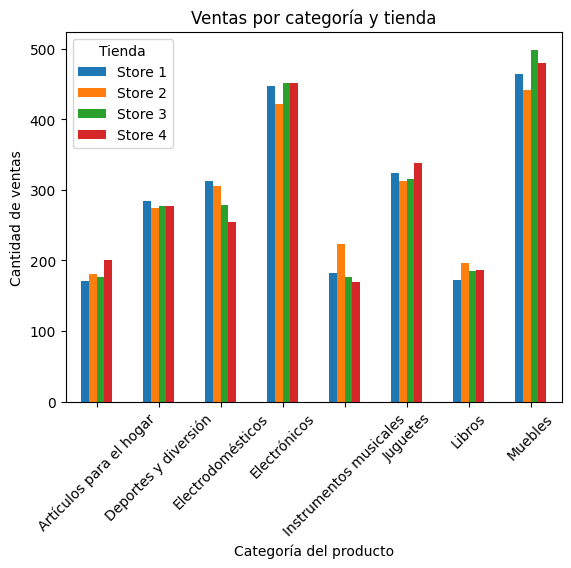

In [28]:
ventas_categoria_tienda = df.groupby(["Tienda", "Categoría del Producto"]).size().reset_index(name="Cantidad")

tabla_cat = ventas_categoria_tienda.pivot(index="Categoría del Producto", columns="Tienda", values="Cantidad").fillna(0)

plt.figure()
tabla_cat.plot(kind="bar")
plt.title("Ventas por categoría y tienda")
plt.xlabel("Categoría del producto")
plt.ylabel("Cantidad de ventas")
plt.xticks(rotation=45)
plt.show()

#Opinión por tienda

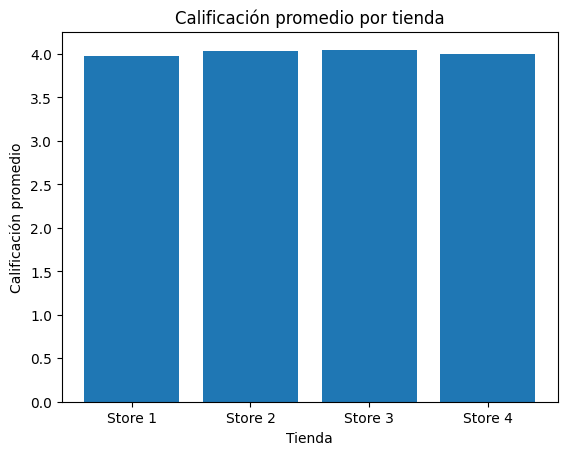

In [29]:
calificacion_tienda = df.groupby("Tienda")["Calificación"].mean()

plt.figure()
plt.bar(calificacion_tienda.index, calificacion_tienda.values)
plt.title("Calificación promedio por tienda")
plt.xlabel("Tienda")
plt.ylabel("Calificación promedio")
plt.show()

**Analisis de negocio**

De acuerdo a los elementos y variables analizadas, se recomienda al Sr. Juan la venta de la tienda 4. Esto debido al desempeño que muestra de acuerdo a los datos, hablando de especificamente de la venta comparada con las demás tiendas.
Otro punto a considerar es que presenta una evaluación más baja por la opinión de los clientes, lo que también habla del desempeño de la tienda.
Sin embargo, la tienda 4 presenta los costes de envio más bajo, aunque no por mucho comparado con las demás tiendas.
Pero considerando los dos primeros puntos de desempeño de tienda, es la que se recomienda traspasar.